<a href="https://colab.research.google.com/github/junsookim76/Ewha_2025/blob/main/5_RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# from mordred import Calculator, descriptors
# from rdkit import Chem
# from rdkit.Chem.Draw import IPythonConsole
# from rdkit.Chem import Draw
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.neural_network import MLPRegressor
# from sklearn.model_selection import train_test_split
# IPythonConsole.ipython_useSVG=True

ImportError: cannot import name 'product' from 'numpy' (/usr/local/lib/python3.11/dist-packages/numpy/__init__.py)

In [1]:
!pip install mordred seaborn rdkit
!pip install numpy==1.23.5

## 1. RDKit

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [3]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

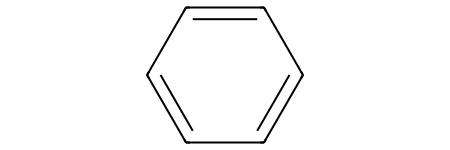

In [4]:
mol=Chem.MolFromSmiles("c1ccccc1")
mol

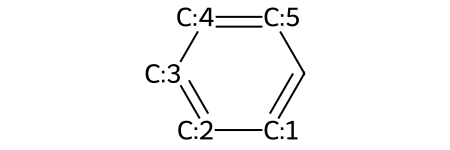

In [5]:
# With atom index
mol_with_atom_index(mol)

In [6]:
!git clone https://github.com/junsookim76/Ewha_2025.git

fatal: destination path 'Ewha_2025' already exists and is not an empty directory.


In [7]:
mols=[]
with open("./Ewha_2025/chembl_mini.smi") as f:
    for line in f.readlines():
        data=line.split()
        mol=Chem.MolFromSmiles(data[0])
        mol.SetProp("chembl_id",data[1])
        mol.SetProp("smiles",data[0])
        mols.append(mol)

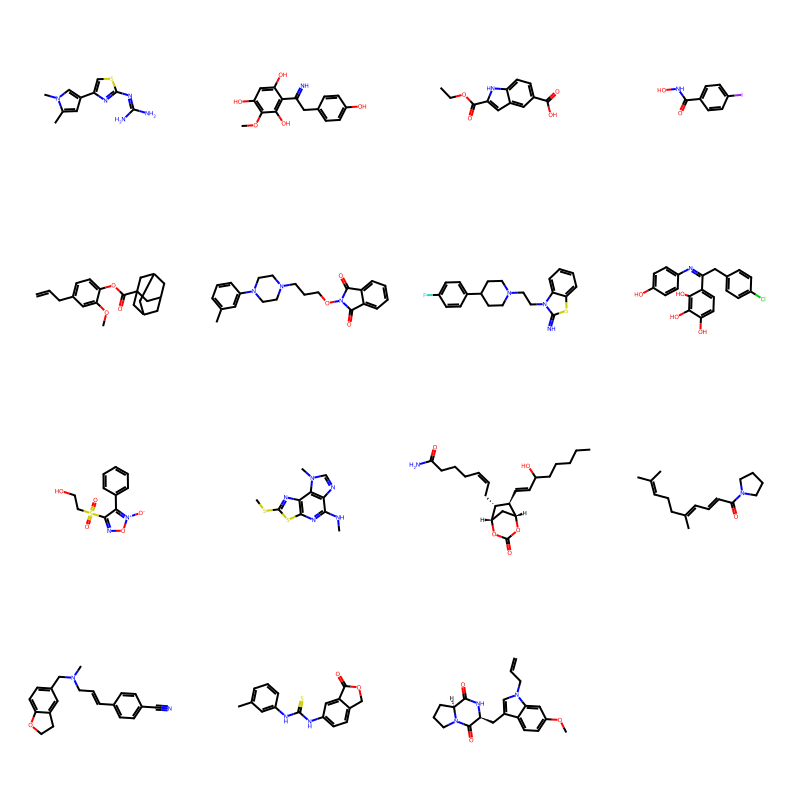

In [8]:
Draw.MolsToGridImage(mols[:15],molsPerRow=4)

In [17]:
from mordred import Calculator, descriptors
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [10]:
calc=Calculator(descriptors.ABCIndex)

In [11]:
calc.register(descriptors.AcidBase)
calc.register(descriptors.Aromatic)
#calc.register(descriptors.AtomCount)
calc.register(descriptors.BondCount)
calc.register(descriptors.BalabanJ)
calc.register(descriptors.HydrogenBond)
calc.register(descriptors.Polarizability)
calc.register(descriptors.WalkCount)
calc.register(descriptors.Weight)
calc.register(descriptors.TopologicalCharge)
mordred=calc.pandas(mols)

100%|██████████| 5000/5000 [00:43<00:00, 113.74it/s]


In [12]:
mordred

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nBonds,nBondsO,nBondsS,nBondsD,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10
0,12.377494,11.320978,0,3,10,10,30,17,19,1,...,0.074074,0.066520,0.048235,0.025481,0.032993,0.012915,0.026878,0.000000,0.000000,0.551803
1,15.901098,13.784340,0,0,12,12,37,22,24,1,...,0.093190,0.068015,0.048315,0.037879,0.018442,0.014853,0.016683,0.008563,0.017524,0.550736
2,12.934771,11.320765,1,0,9,10,29,18,17,2,...,0.088889,0.051215,0.050917,0.030174,0.027647,0.020727,0.011519,0.013333,0.000000,0.516643
3,7.956514,7.521784,0,0,6,6,17,11,10,1,...,0.111111,0.038462,0.047778,0.052778,0.026939,0.000000,0.000000,0.000000,0.000000,0.504340
4,19.099223,14.826865,0,0,6,6,53,27,45,2,...,0.061111,0.046875,0.045657,0.031713,0.011398,0.015224,0.011074,0.009777,0.006870,0.498958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14.170645,11.348074,0,0,11,11,32,20,19,2,...,0.082305,0.021991,0.022722,0.029965,0.028976,0.007653,0.005393,0.008662,0.009437,0.367104
4996,16.484101,15.059143,0,0,11,11,45,22,34,0,...,0.101587,0.071128,0.049706,0.055556,0.016296,0.031308,0.000000,0.000000,0.000000,0.689217
4997,19.396191,15.700007,0,0,18,18,47,27,28,1,...,0.087719,0.051829,0.042339,0.034127,0.019784,0.013125,0.013192,0.008047,0.006806,0.462153
4998,20.034348,15.784135,0,0,18,18,45,28,25,1,...,0.085470,0.041667,0.045497,0.035119,0.019712,0.014509,0.014823,0.006424,0.005669,0.465318


<ipython-input-18-51f566cac23e>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(correlation, dtype=np.bool))


<Axes: >

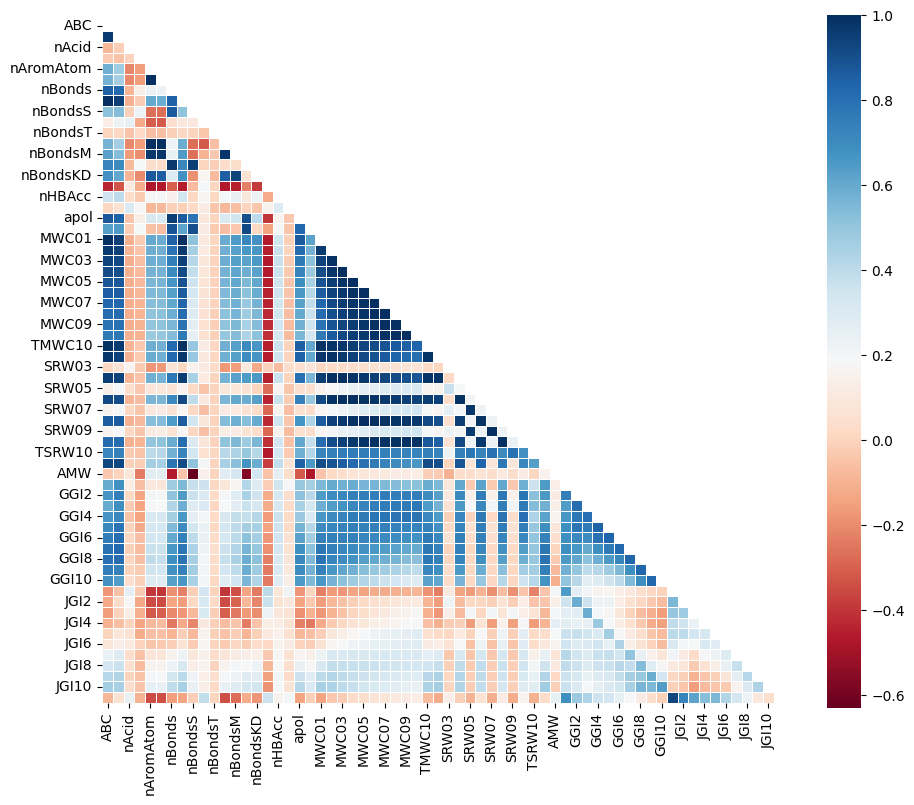

In [18]:
correlation=mordred.corr()
mask=np.triu(np.ones_like(correlation, dtype=np.bool))
f,ax=plt.subplots(figsize=(11, 9))
sns.heatmap(
    correlation,
    mask=mask,
    cmap="RdBu",
    square=True,
    linewidths=0.5,
)

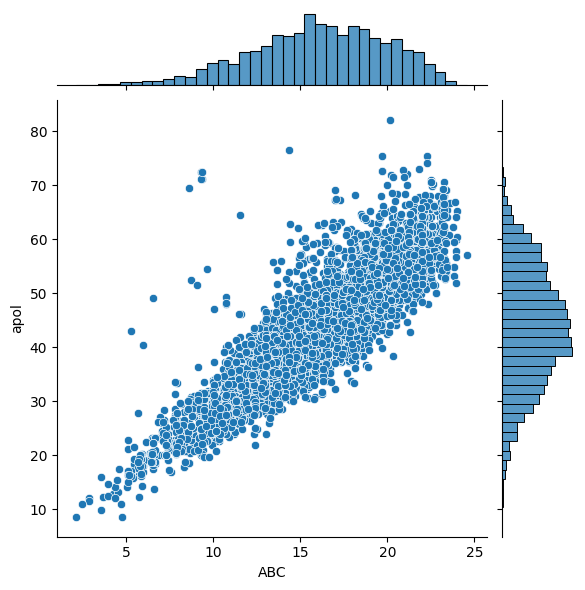

In [19]:
sns.jointplot(x='ABC',y='apol',data=mordred)

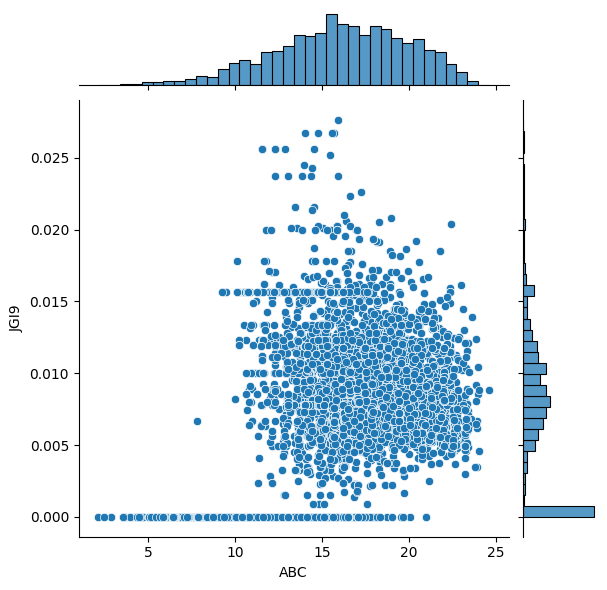

In [20]:
sns.jointplot(x='ABC',y='JGI9',data=mordred)

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


In [22]:
MLR=make_pipeline(QuantileTransformer(),
                MLPRegressor(hidden_layer_sizes=(100, 50, 100),
                             learning_rate_init=0.01,
                             max_iter=500,
                             early_stopping=True))

In [23]:
X=mordred.drop(columns=['MW','AMW'])
y=mordred['MW']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)

In [25]:
MLR.fit(X_train, y_train)

Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True,
                              hidden_layer_sizes=(100, 50, 100),
                              learning_rate_init=0.01, max_iter=500))])

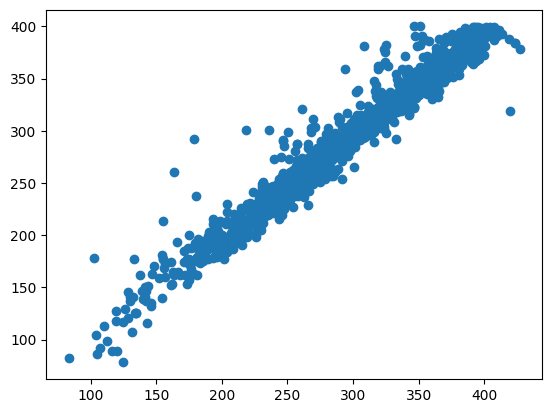

In [26]:
plt.plot(MLR.predict(X_test),y_test,"o")

In [27]:
testsets='''Cc1cccc(/N=N/c2ccc(C(=O)O)cc2)c1	CHEMBL12916
CC1(C)Cc2cc(Cl)cc(Cl)c2C=[N+]1[O-]	CHEMBL12917
O=C(O)CCCCCC(=O)N1CCC2(CCN(c3ccncc3)CC2)C1	CHEMBL13002
CC(C)c1ccc2c(c1)CC[C@H]1[C@@H](CO)[C@@H](O)CC[C@]21C	CHEMBL12668
CC(C)c1ccccc1Sc1c(O)cc(-c2ccc([N+](=O)[O-])cc2)oc1=O	CHEMBL12671
CCCC/C=C(/c1ccc(O)cc1)c1ccc(OCCN(CC)CC)cc1	CHEMBL12959
CC(C)(C)c1ccc(C2OC2c2ccc(C(=O)O)cc2)cc1	CHEMBL12961
O=[N+]([O-])c1ccc(S(=O)(=O)CS(=O)(=O)C(F)(F)F)cc1	CHEMBL12894
CC(C)N(CCC(CCN1CCCCCC1)(C(N)=O)c1ccccc1)C(C)C	CHEMBL12982
Cn1cc(C(=O)c2ccccc2)cc1C=C(C(=O)NO)C(=O)NO	CHEMBL12983
COC(=O)c1ccccc1OCC(O)CNC(C)(C)CNC(N)=O	CHEMBL12984
Cn1cc(C(=O)c2ccccc2)cc1CC(=O)NO	CHEMBL12986
CN1CCN(c2cc3c(cc2F)c(=O)c(C(=O)O)cn3N(C)C)CC1	CHEMBL13004
CC1CCC(NC(=O)N(CCF)N=O)CC1	CHEMBL13005
CNn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCOCC3)cc21	CHEMBL13006
CC(C)(C)c1cc(/C=C/c2nnc(O)o2)cc(C(C)(C)C)c1O	CHEMBL12395
c1ccc2c3c([nH]c2c1)CN(CCc1cnccn1)CC3	CHEMBL12396
'''

In [28]:
testmols=[]
for i in testsets.split():
    if "CHEMBL" not in i:
        mol=Chem.MolFromSmiles(i)
        if mol is not None:
            testmols.append(mol)

In [29]:
testmol_param=calc.pandas(testmols)

100%|██████████| 17/17 [00:00<00:00, 110.72it/s]


In [30]:
testX=testmol_param.drop(columns=['MW','AMW'])

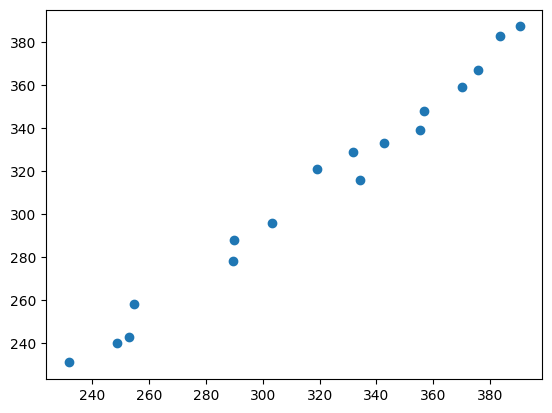

In [31]:
plt.plot(MLR.predict(testX),testmol_param['MW'],"o")

ChatGPT

In [33]:
# Import libraries
# (If you haven't installed them yet, use pip install rdkit-pypi mordred scikit-learn matplotlib)

from rdkit import Chem
from rdkit.Chem import Draw
from mordred import Calculator, descriptors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. RDKit: Molecule input and visualization
print("Step 1: Input molecules using SMILES")

# Example SMILES (Simple molecules)
smiles_list = [
    'CCO',  # ethanol
    'CC(=O)O',  # acetic acid
    'CCN',  # ethylamine
    'CCOCC',  # diethyl ether
    'C1=CC=CC=C1'  # benzene
]

# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Draw the molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200,200))
# img.show()

# 2. Mordred: Calculate descriptors
print("\nStep 2: Calculate molecular descriptors")

# Set up Mordred calculator
calc = Calculator(descriptors, ignore_3D=True)

# Calculate descriptors for each molecule
# Note: it may take some time depending on how many descriptors you calculate
X = calc.pandas(molecules)

# Show the descriptors
print(X.head())

# Clean the descriptor data (drop columns with NaN)
X_clean = X.dropna(axis=1)

print(f"\nNumber of descriptors after cleaning: {X_clean.shape[1]}")

# 3. sklearn: Build a simple machine learning model
print("\nStep 3: Machine learning with descriptors")

# For example, let's assume an arbitrary property to predict (fake data)
# Here, we assign random target values
np.random.seed(0)
y = np.random.rand(len(molecules)) * 10  # random "property"

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.3f}")

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Simple Regression Result")
plt.plot([0,10], [0,10], 'r--')  # Line y=x
plt.show()

print("\nDone!")

# Additional note: In real cases, y would be a real measured property like boiling point, solubility, etc.


Step 1: Input molecules using SMILES

Step 2: Calculate molecular descriptors


100%|██████████| 5/5 [00:00<00:00,  6.53it/s]


        ABC     ABCGG  nAcid  nBase   SpAbs_A   SpMax_A  SpDiam_A    SpAD_A  \
0  1.414214  1.414214      0      0  2.828427  1.414214  2.828427  2.828427   
1  2.449490  2.449490      1      0  3.464102  1.732051  3.464102  3.464102   
2  1.414214  1.414214      0      1  2.828427  1.414214  2.828427  2.828427   
3  2.828427  3.146264      0      0  5.464102  1.732051  3.464102  5.464102   
4  4.242641  4.000000      0      0  8.000000  2.000000  4.000000  8.000000   

    SpMAD_A   LogEE_A  ...     SRW10     TSRW10         MW       AMW  WPath  \
0  0.942809  1.849457  ...  4.174387  17.310771  46.041865  5.115763      4   
1  0.866025  2.178059  ...  6.188264  24.179697  60.021129  7.502641      9   
2  0.942809  1.849457  ...  4.174387  17.310771  45.057849  4.505785      4   
3  1.092820  2.390167  ...  6.192362  25.583106  74.073165  4.938211     20   
4  1.333333  2.687624  ...  7.627057  30.941317  78.046950  6.503913     27   

   WPol  Zagreb1  Zagreb2  mZagreb1  mZagreb2  
0 

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values